# Mini Project2 on Product Hair Service Management

In [84]:
#Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale # 

%matplotlib inline
rcParams['figure.figsize']=16,10
sb.set_style("whitegrid")

In [85]:
#Check Current working directory
%pwd

'C:\\Users\\jdas\\Downloads\\Analytics Data\\Great Lakes Learnings\\Advance Statistics\\Project 2'

### Read and Analyse the Data

In [87]:
# Environment Set up and Data Import
hair=pd.read_csv('Factor-Hair-Revised.csv')
hair.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [88]:
#We don't need to first columns for future computations
#hair=hair.loc[:,'ProdQual':'Satisfaction']
#hair.drop(columns=['ID'],inplace=True)
hair.drop('ID',axis=1,inplace=True)
hair.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [89]:
#Check the number of Rows and columns
hair.shape

(100, 12)

In [90]:
hair.columns

Index(['ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising', 'ProdLine',
       'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling', 'DelSpeed',
       'Satisfaction'],
      dtype='object')

In [91]:
# Check for null values
hair.isnull().values.any()

False

In [92]:
hair.dtypes

ProdQual        float64
Ecom            float64
TechSup         float64
CompRes         float64
Advertising     float64
ProdLine        float64
SalesFImage     float64
ComPricing      float64
WartyClaim      float64
OrdBilling      float64
DelSpeed        float64
Satisfaction    float64
dtype: object

In [93]:
#Check the summary of the hair dataset
hair.describe()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


[]

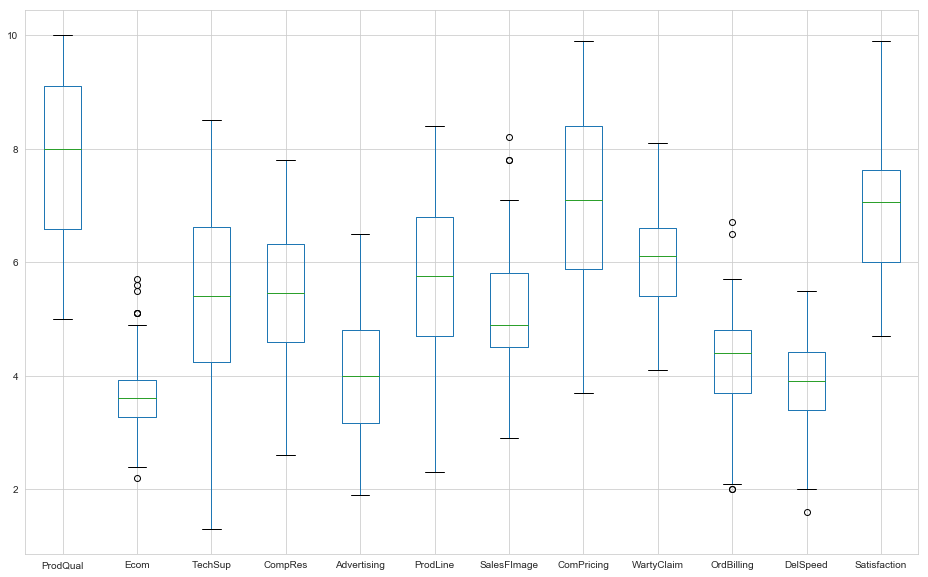

In [94]:
#Identifying outlier from boxplots
hair.boxplot(return_type='dict')
plt.plot()

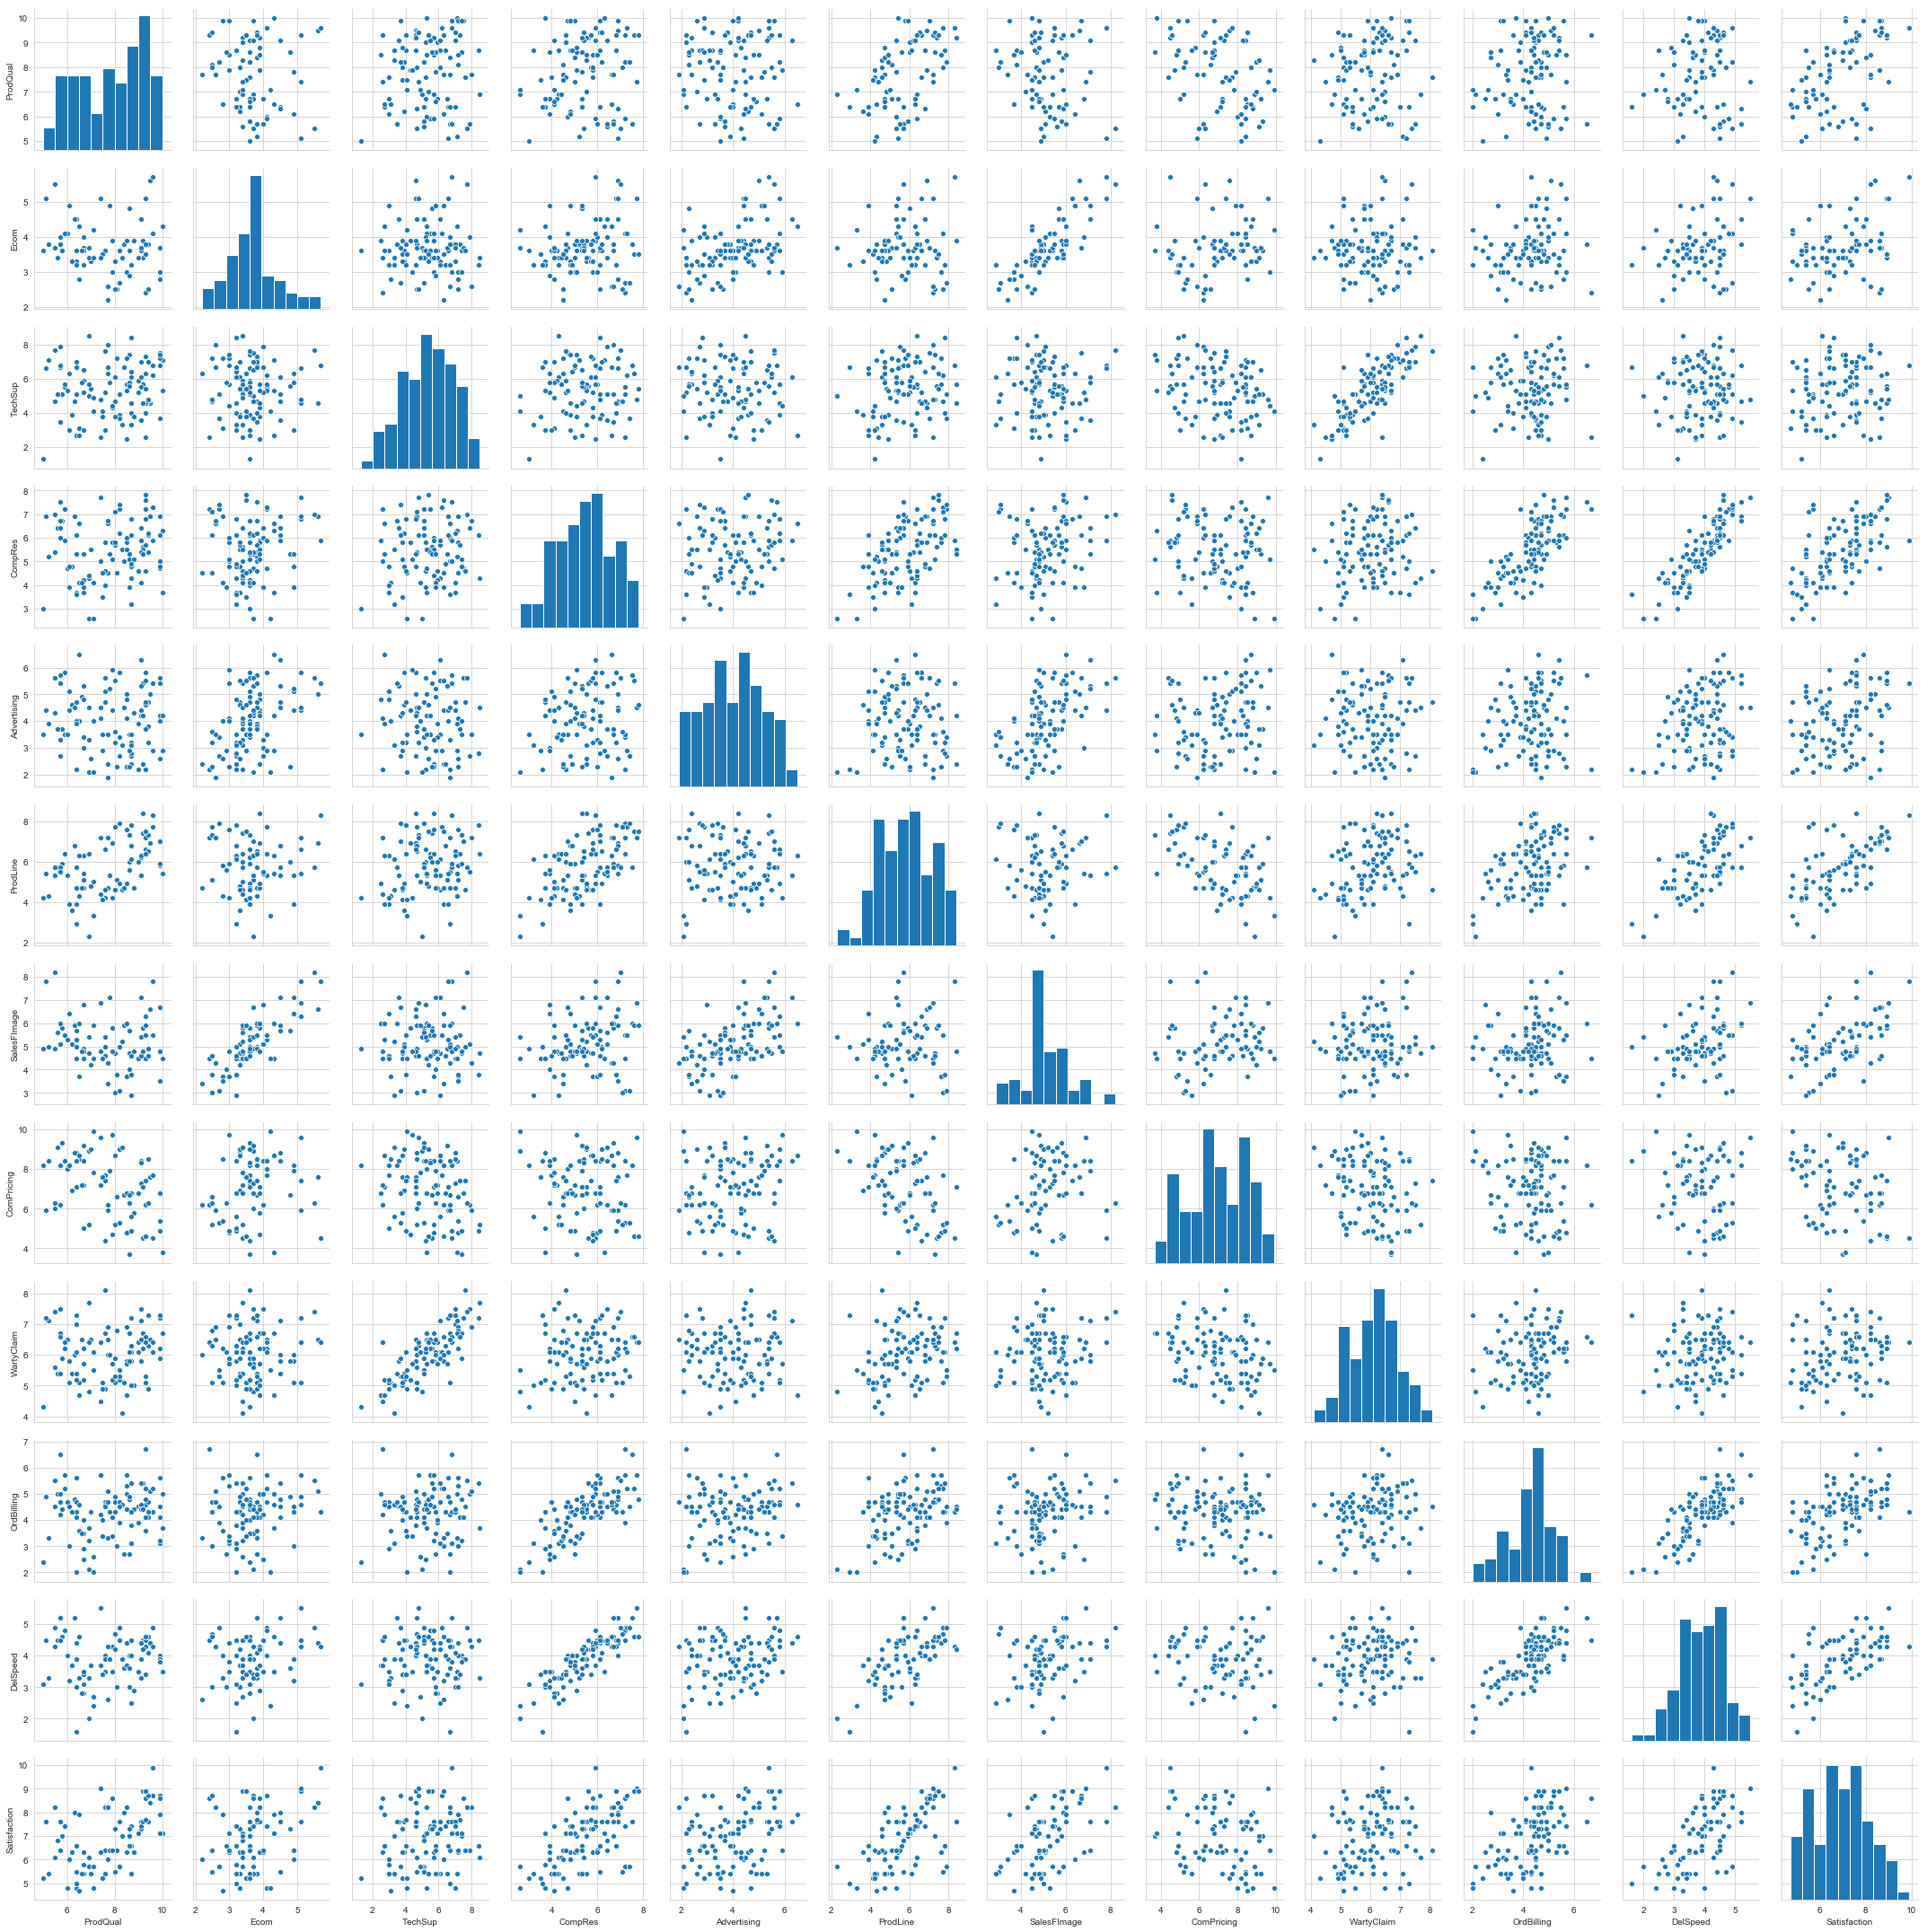

In [95]:
sb.pairplot(hair,palette='tab20c')
#As we can see that the data is normally distributed

#### Check for the correlation with the variables in the hair dataset

In [96]:
hair.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


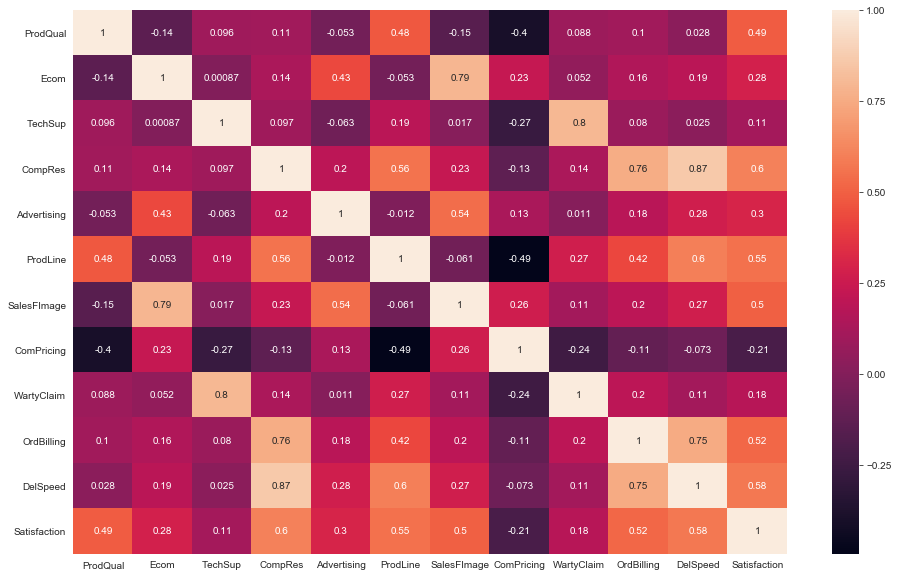

In [102]:
#lets plot a matshow graph from matplotlib to show the correlation between each columns
cor=hair.corr()
sb.heatmap(cor, annot=True)

## Multiple Linear Regression

#### Relationship between Satisfaction and all other columns

In [103]:
import statsmodels.formula.api as sm
colnames = list(hair.iloc[:,0:11].columns)
colnames

['ProdQual',
 'Ecom',
 'TechSup',
 'CompRes',
 'Advertising',
 'ProdLine',
 'SalesFImage',
 'ComPricing',
 'WartyClaim',
 'OrdBilling',
 'DelSpeed']

In [104]:
MLR_Model=sm.ols('Satisfaction~ProdQual+Ecom+TechSup+CompRes+Advertising+ProdLine+SalesFImage+ComPricing+WartyClaim+OrdBilling+DelSpeed',hair).fit()
MLR_Model.params

Intercept     -0.669610
ProdQual       0.371368
Ecom          -0.440557
TechSup        0.032991
CompRes        0.167032
Advertising   -0.026017
ProdLine       0.140338
SalesFImage    0.806106
ComPricing    -0.038527
WartyClaim    -0.102982
OrdBilling     0.146345
DelSpeed       0.165695
dtype: float64

### Our model equation can be written as:
* Satisfaction = -0.66 + 0.37*ProdQual - 0.44*Ecom + 0.034*TechSup + 0.16*CompRes - 0.02*Advertising + 0.14ProdLine + 0.80*SalesFImage - 0.038*CompPricing - 0.10*WartyClaim + 0.14*OrdBilling + 0.16*DelSpeed
* On an average for Product Quality it can be interpreted as 1 unit increase in Product Quality leads to an increase in Customer Satisfaction by approximately 0.37136 *1 unit(Satisfaction).
* For E-Commerce, it can be interpreted as 1 unit increase in E-Commerce leads to decrease in Customer Satisfaction by approximately -0.44055 *1 unit(Satisfaction).

In [106]:
# The Residual Sum of Squares (RSS)
hair_subset = hair.iloc[:,0:11]
y_pred = MLR_Model.predict(hair_subset)
RSS = np.sum((y_pred - hair.Satisfaction)**2)
RSS

27.828839463733317

In [41]:
# Model Predictions Values
from pandas import DataFrame

Org_col=pd.DataFrame(hair['Satisfaction'])
Pred_col=pd.DataFrame(y_pred).astype(float)

Values=pd.merge(Org_col, Pred_col, left_index=True, right_index=True)
Values.columns = ['Orginal Values','Predicted Values']
Values

,Orginal Values,Predicted Values
0,8.2,7.835026
1,5.7,6.688189
2,8.9,8.666668
3,4.8,5.333509
4,7.1,6.875291
5,4.7,5.000756
6,5.7,5.284635
7,6.3,6.026553
8,7.0,7.033061
9,5.5,6.633588


In [107]:
#Total Sum of Squares (TSS):
y_mean = np.mean(hair.Satisfaction) # mean of Satisfaction
TSS = np.sum((hair.Satisfaction - y_mean)**2)
TSS

140.6276

In [108]:
#The F-statistic is the ratio between (TSS-RSS)/p and RSS/(n-p-1):
p=11 # we have 11 predictors.
n=100 # we have 100 data points.
F = ((TSS-RSS)/p) / (RSS/(n-p-1))
F
#F is far larger than 1: at least one of the independant variables must be related to Satisfaction.

32.42643608858115

In [109]:
RSE = np.sqrt((1/(n-2))*RSS); 
RSE

0.5328862445493707

In [45]:
np.mean(hair.Satisfaction)

6.918000000000003

In [110]:
R2 = 1 - RSS/TSS; 
R2

0.8021096892520863

* RSE is 0.53 units while the mean value for the response is 6.91, indicating a percentage error of roughly 13%.

In [111]:
# Summary
MLR_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Satisfaction   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     32.43
Date:                Fri, 03 May 2019   Prob (F-statistic):           2.61e-26
Time:                        00:08:05   Log-Likelihood:                -77.939
No. Observations:                 100   AIC:                             179.9
Df Residuals:                      88   BIC:                             211.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6696      0.812     -0.824      0.412      -2.284       0.945
ProdQual        0.3714      0.052      7.173      0.000       0.268       0.474
Ecom           -0.4406      0.134     -3.289      0.001      -0.707      -0.174
TechSup         0.0330      0.064      0.518      0.606      -0.094       0.160
CompRes         0.1670      0.102      1.642      0.104      -0.035       0.369
Advertising    -0.0260      0.062     -0.422      0.674      -0.148       0.096
ProdLine        0.1403      0.080      1.749      0.084      -0.019       0.300
SalesFImage     0.8061      0.098      8.247      0.000       0.612       1.000
ComPricing     -0.0385      0.047     -0.824      0.412      -0.131       0.054
WartyClaim     -0.1030      0.123     -0.835      0.406      -0.348       0.142
OrdBilling      0.1463      0.104      1.412      0.162      -0.060       0.352
DelSpeed        0.1657      0.196      0.844      0.401      -0.225       0.556
==============================================================================
Omnibus:                        6.407   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.559
Skew:                          -0.623   Prob(JB):                       0.0376
Kurtosis:                       2.860   Cond. No.                         264.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As in our model the adjusted R-squared:  0.777, meaning that 77% of the variance in the measure of Customer Satisfaction can be predicted by all 11 Variables

## Dimensionality Reduction
### Principal Component Analysis/Factor Analysis

In [112]:
hair=pd.read_csv('Factor-Hair-Revised.csv')
hair.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [61]:
variable_names=list(hair.columns)
variable_names

['ID',
 'ProdQual',
 'Ecom',
 'TechSup',
 'CompRes',
 'Advertising',
 'ProdLine',
 'SalesFImage',
 'ComPricing',
 'WartyClaim',
 'OrdBilling',
 'DelSpeed',
 'Satisfaction']

In [64]:
values=hair.values
values

array([[  1. ,   8.5,   3.9, ...,   5. ,   3.7,   8.2],
       [  2. ,   8.2,   2.7, ...,   3.9,   4.9,   5.7],
       [  3. ,   9.2,   3.4, ...,   5.4,   4.5,   8.9],
       ...,
       [ 98. ,   8.7,   3.2, ...,   3.1,   2.5,   5.4],
       [ 99. ,   7.8,   4.9, ...,   4.3,   3.9,   6.4],
       [100. ,   7.9,   3. , ...,   3.4,   3.5,   6.4]])

In [113]:
#scale the values so that all the variable values are in the same range
scaled_data=scale(values)

In [114]:
### Analysis/PCA with 12 Components
pca=PCA()
pca.fit(scaled_data)
print(pca.explained_variance_ratio_)

[0.31149296 0.19666427 0.13281864 0.10543463 0.06437306 0.04853871
 0.04209623 0.03098504 0.02447284 0.01811158 0.01101896 0.00762562
 0.00636746]


In [78]:
sum(list(pca.explained_variance_ratio_))

1.0

### PCA with 4 Components

In [79]:
pca4=PCA(n_components=4)
pca4.fit(scaled_data)
print(pca4.explained_variance_ratio_)

[0.31149296 0.19666427 0.13281864 0.10543463]


In [115]:
sum(list(pca4.explained_variance_ratio_))

0.746410496807695

* Component 1 accounts for 31.14% of the variance.
* Component 2 accounts for 19.66% of the variance.
* Component 3 accounts for 13.28% of the variance.
* Component 4 accounts for 10% of the variance. 
### All 4 Component together explain for 74.64% of the variance in performance.

In [116]:
Components=pd.DataFrame(pca4.components_,columns=variable_names)
Components

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.046594,-0.155279,-0.166500,-0.123577,-0.423728,-0.179455,-0.352049,-0.217356,0.132807,-0.173042,-0.389578,-0.423881,-0.410811
1,-0.049839,-0.318715,0.437193,-0.241768,0.003334,0.351667,-0.298366,0.459528,0.420096,-0.205607,0.011909,0.057034,0.018122
2,-0.231014,0.003507,-0.248577,-0.569701,0.214220,-0.133207,0.102414,-0.266895,0.067350,-0.565542,0.183138,0.237586,-0.023552
3,0.497373,0.524589,0.086271,-0.293688,-0.172256,0.207530,0.091924,0.127488,-0.168133,-0.280423,-0.220415,-0.181787,0.312653


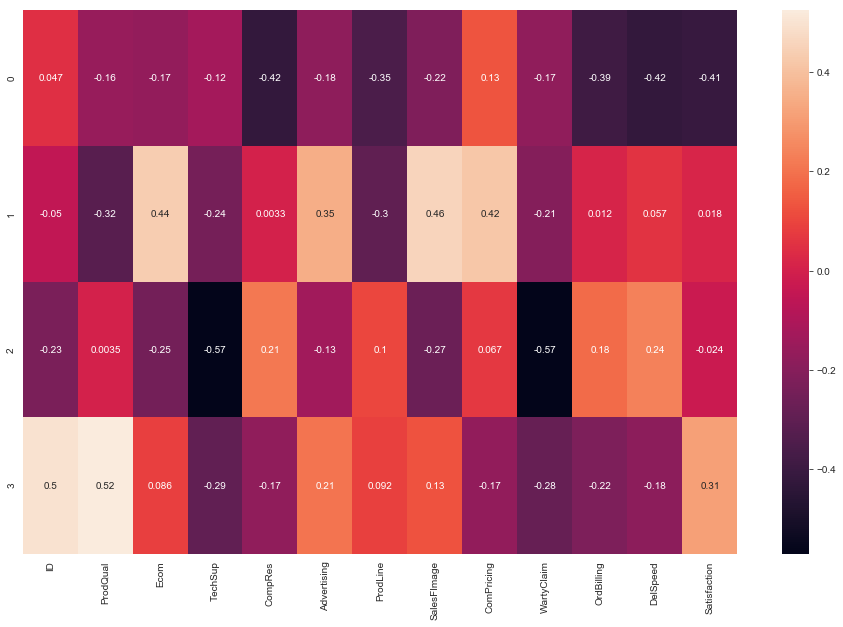

In [117]:
sb.heatmap(Components,annot=True)